## 1. Evolution of Total Child Support Payments Over the Last Ten Years

In [4]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())


Current Working Directory: /Users/asmafarooq/github/Project2_Farooq_Russell_Fields


In [6]:
# Load the data from the Excel file specifically from the 'P-4' sheet
file_path = '/Users/asmafarooq/github/Project2_Farooq_Russell_Fields/fy_2022_preliminary_data_tables.xlsx'
file_path = '/Users/asmafarooq/github/Project2_Farooq_Russell_Fields/fy_2017_annual_report_data_tables.xlsx'

In [6]:
import pandas as pd

# Load the '4' sheet from the 2017 file and 'P-4' sheet from the 2022 file
file_path_2017 = '/Users/asmafarooq/github/Project2_Farooq_Russell_Fields/fy_2017_annual_report_data_tables.xlsx'
file_path_2022 = '/Users/asmafarooq/github/Project2_Farooq_Russell_Fields/fy_2022_preliminary_data_tables.xlsx'


p4_2017 = pd.read_excel(file_path_2017, sheet_name='4', index_col=0, header=2)
p4_2022 = pd.read_excel(file_path_2022, sheet_name='P-4', index_col=0, header=2)

# Function to clean state names in the index
def clean_state_names(df):
    df.index = df.index.astype(str).str.strip().str.upper()
    df = df[~df.index.duplicated(keep='first')]
    return df

# Clean the state names in the index of both DataFrames
p4_2017_clean = clean_state_names(p4_2017)
p4_2022_clean = clean_state_names(p4_2022)

# Concatenate the cleaned DataFrames
combined_p4 = pd.concat([p4_2017_clean, p4_2022_clean], axis=1)

# Calculate the total payments for each year across all states
total_payments_by_year = combined_p4.sum()

# Convert the totals to millions for readability
total_payments_by_year_in_millions = total_payments_by_year / 1e6

# Display the total payments by year in millions
total_payments_by_year_in_millions



2013    56013.200380
2014    56398.112226
2015    57118.268350
2016    57668.424198
2017    57250.588166
2018    57168.745188
2019    57534.371888
2020    62845.506290
2021    59043.754336
2022    54808.216762
dtype: float64

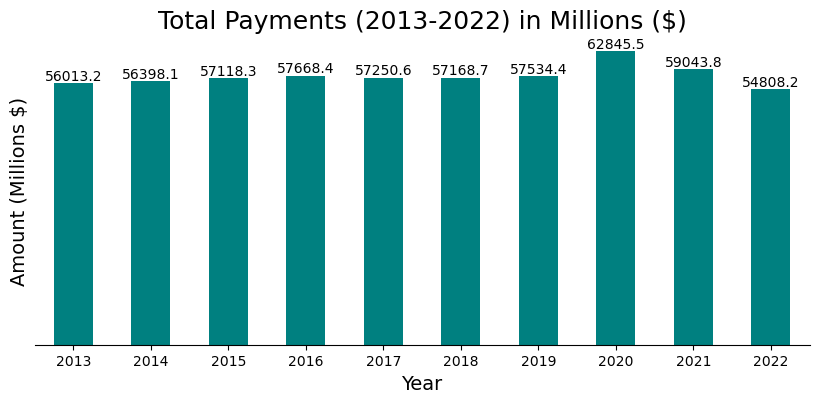

In [36]:
import matplotlib.pyplot as plt


# Create a bar chart
plt.figure(figsize=(10, 4))
bar_chart = total_payments_by_year_in_millions.plot(kind='bar', color='#008080', rot=0)

# Set title and axis labels
plt.title('Total Payments (2013-2022) in Millions ($)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount (Millions $)', fontsize=14)

# Add data labels per bar in millions
for container in bar_chart.containers:
    bar_chart.bar_label(container, fmt='%.1f')

# Customize the aesthetics
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.yticks(ticks=[])

# Show the plot
plt.show()



## 2. Are there any specific trends or changes in child support payments during this period?

In [44]:
import pandas as pd

# Convert the year columns to numeric values
combined_p4 = combined_p4.apply(pd.to_numeric, errors='coerce')

# Calculate the total payments for each year from 2013 to 2022
total_payments_combined = combined_p4.sum()

# Calculate year-over-year absolute change and percentage change
yearly_change_combined = total_payments_combined.diff()
percentage_change_combined = total_payments_combined.pct_change() * 100

# Formatting the output to display numbers without scientific notation
formatted_yearly_change_combined = yearly_change_combined.apply(lambda x: f"{x:,.2f}")
formatted_percentage_change_combined = percentage_change_combined.apply(lambda x: f"{x:.2f}%")

# Print the formatted changes for combined data from 2013 to 2022
print("Year-over-Year Change:")
print(formatted_yearly_change_combined)
print("\nPercentage Change:")
print(formatted_percentage_change_combined)


Year-over-Year Change:
2013                  nan
2014       384,911,846.00
2015       720,156,124.00
2016       550,155,848.00
2017      -417,836,032.00
2018       -81,842,978.00
2019       365,626,700.00
2020     5,311,134,402.00
2021    -3,801,751,954.00
2022    -4,235,537,574.00
dtype: object

Percentage Change:
2013      nan%
2014     0.69%
2015     1.28%
2016     0.96%
2017    -0.72%
2018    -0.14%
2019     0.64%
2020     9.23%
2021    -6.05%
2022    -7.17%
dtype: object


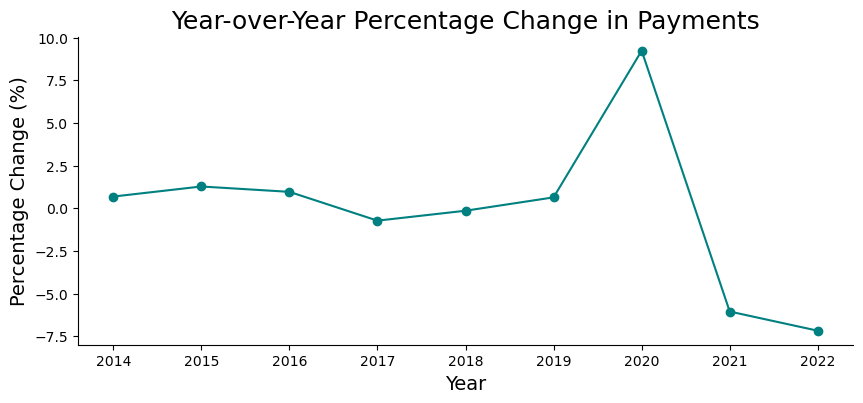

In [46]:
# Graph showing percentage trend

import matplotlib.pyplot as plt

# Assuming 'percentage_change_df' contains the percentage change data

# Line chart
plt.figure(figsize=(10, 4))
line_chart = plt.plot(percentage_change_df['Year'], percentage_change_df['Percentage Change'], marker='o', color='teal')

# Set axis label sizes, title and labels
plt.title('Year-over-Year Percentage Change in Payments', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage Change (%)', fontsize=14)

# Customize the aesthetics for a plain white background
plt.grid(False)  # Disables the grid
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True  # Keeping the bottom spine for reference
plt.rcParams['figure.facecolor'] = 'white'  # Sets the figure background to white
plt.rcParams['axes.facecolor'] = 'white'  # Sets the axes background to white

plt.show()


# 3. Trend analysis between child payment, inflation, unemployment and divorce rate

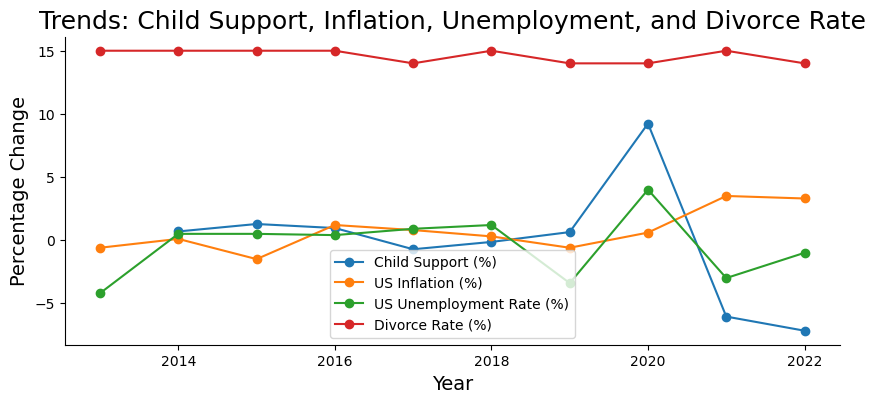

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data provided by user
data = {
    'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Child Support (%)': [None, 0.69, 1.28, 0.96, -0.72, -0.14, 0.64, 9.23, -6.05, -7.17],
    'US Inflation (%)': [-0.6, 0.1, -1.5, 1.2, 0.8, 0.3, -0.6, 0.6, 3.5, 3.3],
    'US Unemployment Rate (%)': [-4.2, 0.5, 0.5, 0.4, 0.9, 1.2, -3.4, 4, -3, -1],
    'Divorce Rate (%)': [15, 15, 15, 15, 14, 15, 14, 14, 15, 14]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plotting the line graph
plt.figure(figsize=(10, 4))

# For each column except 'Year', plot a line
for column in df.columns[1:]:
    plt.plot(df['Year'], df[column], marker='o', label=column)

# Set title and axis labels
plt.title('Trends: Child Support, Inflation, Unemployment, and Divorce Rate', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage Change', fontsize=14)

# Customize the aesthetics for a plain white background
plt.grid(False)  # Disables the grid
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True  # Keeping the bottom spine for reference
plt.rcParams['figure.facecolor'] = 'white'  # Sets the figure background to white
plt.rcParams['axes.facecolor'] = 'white'  # Sets the axes background to white

# Display legend
plt.legend()

plt.show()


## 6. What is the average child support payment per case in each year?

In [19]:
import pandas as pd

# Load the '4' sheet from the 2017 file and 'P-4' sheet from the 2022 file
file_path_2017 = '/Users/asmafarooq/github/Project2_Farooq_Russell_Fields/fy_2017_annual_report_data_tables.xlsx'
file_path_2022 = '/Users/asmafarooq/github/Project2_Farooq_Russell_Fields/fy_2022_preliminary_data_tables.xlsx'


p4_2017 = pd.read_excel(file_path_2017, sheet_name='4', index_col=0, header=2)
p4_2022 = pd.read_excel(file_path_2022, sheet_name='P-4', index_col=0, header=2)


# Function to clean state names in the index
def clean_state_names(df):
    df.index = df.index.astype(str).str.strip().str.upper()
    df = df[~df.index.duplicated(keep='first')]
    return df

# Clean the state names in the index of both DataFrames
p4_2017_clean = clean_state_names(p4_2017)
p4_2022_clean = clean_state_names(p4_2022)


# Concatenate the cleaned DataFrames
combined_p4 = pd.concat([p4_2017_clean, p4_2022_clean], axis=1)


# Re-reading the sheets and setting the correct header row
data_2017_sheet3_reprocessed = pd.read_excel(file_2017, sheet_name='3', header=2)
data_2022_p3_reprocessed = pd.read_excel(file_2022, sheet_name='P-3', header=2)

# Dropping any additional header rows or empty rows
data_2017_sheet3_reprocessed.dropna(how='all', inplace=True)
data_2022_p3_reprocessed.dropna(how='all', inplace=True)

# Resetting index
data_2017_sheet3_reprocessed.reset_index(drop=True, inplace=True)
data_2022_p3_reprocessed.reset_index(drop=True, inplace=True)

# Manually setting the column names for both datasets
data_2017_sheet3_reprocessed.columns = ['Program Trends'] + data_2017_sheet3_reprocessed.columns[1:].tolist()
data_2022_p3_reprocessed.columns = ['Program Trends'] + data_2022_p3_reprocessed.columns[1:].tolist()

# Merging the datasets
combined_data = pd.merge(data_2017_sheet3_reprocessed, data_2022_p3_reprocessed, on="Program Trends", how="outer")


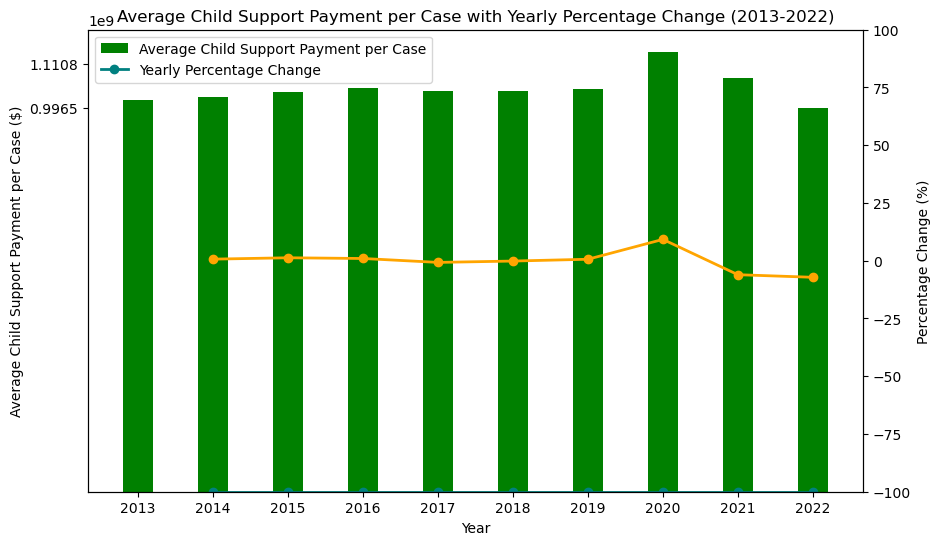

In [31]:
# Ploting the values

plt.figure(figsize=(10, 6))

# Create bar chart for average payments
bars = plt.bar(average_child_support_df['Year'], average_child_support_df['Average Child Support Payment per Case'], 
               color='green', width=0.4, label='Average Child Support Payment per Case')

# Create line chart for the percentage change
line, = plt.plot(average_child_support_df['Year'], average_child_support_df['Percentage Change'], 
                 color='teal', marker='o', linestyle='-', linewidth=2, 
                 label='Yearly Percentage Change')

# Adding titles and labels
plt.title('Average Child Support Payment per Case with Yearly Percentage Change (2013-2022)')
plt.xlabel('Year')
plt.ylabel('Average Child Support Payment per Case ($)')

# Customizing the axes ticks for better readability
plt.xticks(average_child_support_df['Year'])
plt.yticks(range(int(min(average_child_support_df['Average Child Support Payment per Case'])), 
                 int(max(average_child_support_df['Average Child Support Payment per Case'])), 
                 int(max(average_child_support_df['Average Child Support Payment per Case'])/10)))  # Set y-ticks to be 10% of max value

# Setting the background to plain white
plt.gca().set_facecolor('white')
plt.grid(False)

# Adding a secondary y-axis for the percentage change
ax2 = plt.twinx()
ax2.plot(average_child_support_df['Year'], average_child_support_df['Percentage Change'], 
         color='orange', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Percentage Change (%)')
ax2.set_ylim([-100, 100])  # Assuming percentage change ranges from -100% to 100%

# Add a legend
plt.legend(handles=[bars, line], loc='upper left')

# Show the chart with a plain white background
plt.show()


## 4. How has the average payment amount changed annually?

In [27]:
# We already have the DataFrame 'average_child_support_df' with the relevant data
# To calculate the annual change in the average child support payment amount,
# we can use the 'diff' method which computes the difference of a DataFrame element compared with another element

# Calculate the annual change in average payment
average_child_support_df['Annual Change'] = average_child_support_df['Average Child Support Payment per Case'].diff()

# The 'diff' method will result in a NaN value for the first entry, which we can fill with zero or leave as NaN as there is no previous year in the dataset.
average_child_support_df

,Year,Average Child Support Payment per Case,Percentage Change,Annual Change
0,2013,1.018422e+09,NaN,NaN
1,2014,1.025420e+09,0.687181,6.998397e+06
2,2015,1.038514e+09,1.276915,1.309375e+07
3,2016,1.048517e+09,0.963187,1.000283e+07
4,2017,1.040920e+09,-0.724549,-7.597019e+06
5,2018,1.039432e+09,-0.142956,-1.488054e+06
6,2019,1.046079e+09,0.639557,6.647758e+06
7,2020,1.142646e+09,9.231237,9.656608e+07
8,2021,1.073523e+09,-6.049362,-6.912276e+07
9,2022,9.965130e+08,-7.173557,-7.700977e+07


## 5. Arrearages Trends

In [44]:
# Load the data

file_path_2017 = '/Users/asmafarooq/github/Project2_Farooq_Russell_Fields/fy_2017_annual_report_data_tables.xlsx'
file_path_2022 = '/Users/asmafarooq/github/Project2_Farooq_Russell_Fields/fy_2022_preliminary_data_tables.xlsx'


p85_2017 = pd.read_excel(file_path_2017, sheet_name='85', index_col=0, header=2)
p85_2022 = pd.read_excel(file_path_2022, sheet_name='P-85', index_col=0, header=2)

p86_2017 = pd.read_excel(file_path_2017, sheet_name='86', index_col=0, header=2)
p86_2022 = pd.read_excel(file_path_2022, sheet_name='P-86', index_col=0, header=2)

p87_2017 = pd.read_excel(file_path_2017, sheet_name='87', index_col=0, header=2)
p87_2022 = pd.read_excel(file_path_2022, sheet_name='P-87', index_col=0, header=2)

p88_2017 = pd.read_excel(file_path_2017, sheet_name='88', index_col=0, header=2)
p88_2022 = pd.read_excel(file_path_2022, sheet_name='P-88', index_col=0, header=2)


# Function to clean state names in the index
def clean_state_names(df):
    df.index = df.index.astype(str).str.strip().str.upper()
    df = df[~df.index.duplicated(keep='first')]
    return df

# Clean the state names in the index of both DataFrames
p85_2017_clean = clean_state_names(p85_2017)
p85_2022_clean = clean_state_names(p85_2022)

p86_2017_clean = clean_state_names(p86_2017)
p86_2022_clean = clean_state_names(p86_2022)

p87_2017_clean = clean_state_names(p87_2017)
p87_2022_clean = clean_state_names(p87_2022)

p88_2017_clean = clean_state_names(p88_2017)
p88_2022_clean = clean_state_names(p88_2022)


# Concatenate the cleaned DataFrames
combined_p85 = pd.concat([p85_2017_clean, p85_2022_clean], axis=1)
combined_p86 = pd.concat([p86_2017_clean, p86_2022_clean], axis=1)
combined_p87 = pd.concat([p87_2017_clean, p87_2022_clean], axis=1)
combined_p88 = pd.concat([p88_2017_clean, p88_2022_clean], axis=1)

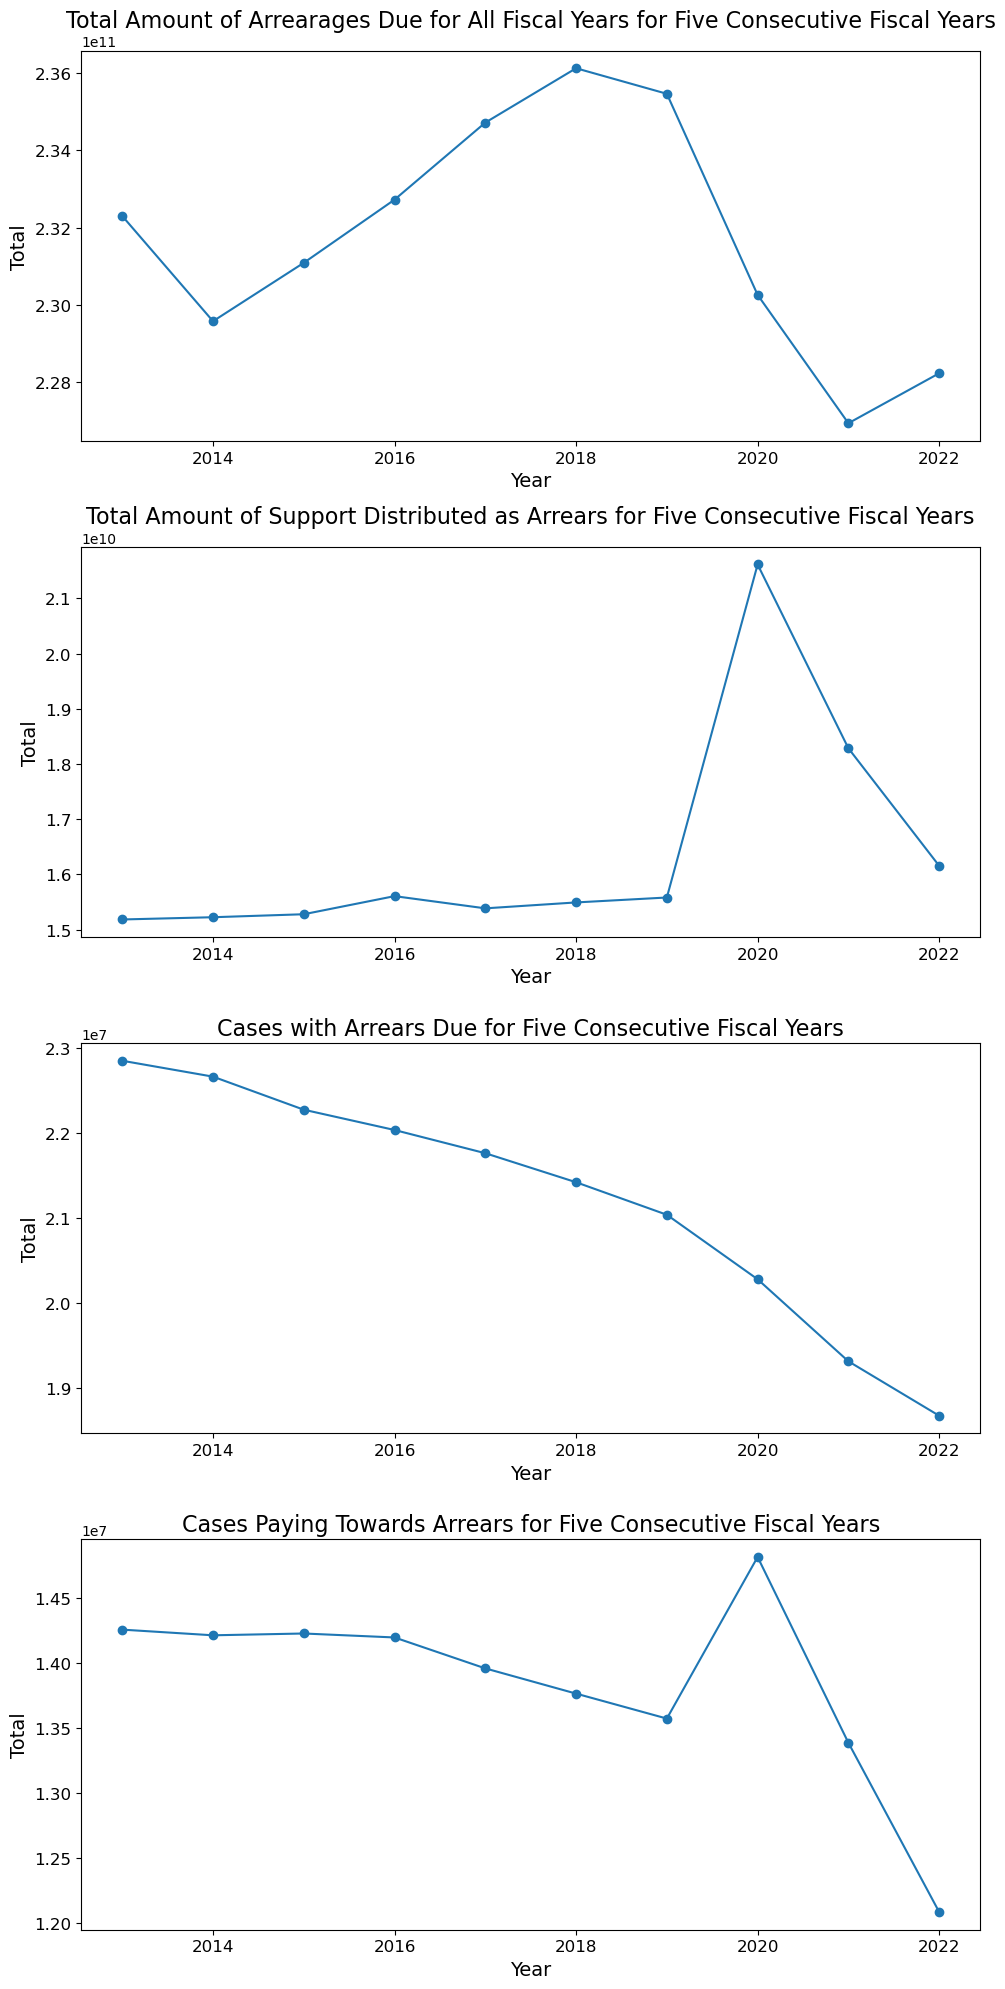

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Combined DataFrames are structured with years as columns and data as rows
dataframes = [combined_p85, combined_p86, combined_p87, combined_p88]
titles = [
    'Total Amount of Arrearages Due for All Fiscal Years for Five Consecutive Fiscal Years', 
    'Total Amount of Support Distributed as Arrears for Five Consecutive Fiscal Years', 
    'Cases with Arrears Due for Five Consecutive Fiscal Years', 
    'Cases Paying Towards Arrears for Five Consecutive Fiscal Years'
]

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 20))  # Adjust the size as needed

# Loop through each DataFrame and plot the sum of each year's data as a line
for i, df in enumerate(dataframes):
    years = df.columns.astype(int)  # Extract the years as integers
    totals = df.sum()  # Calculate the sum of data for each year
    
    axs[i].plot(years, totals, marker='o', linestyle='-')
    axs[i].set_title(titles[i], fontsize=16)  # Increased font size for title
    axs[i].set_xlabel('Year', fontsize=14)  # Increased font size for x-label
    axs[i].set_ylabel('Total', fontsize=14)  # Increased font size for y-label
    axs[i].tick_params(labelsize=12)  # Increased font size for axis ticks
    axs[i].grid(False)  # Enabled grid for better readability

# Set the background color to white
fig.patch.set_facecolor('white')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## 6. How do payments under different assistance programs (like "Current Assistance IV-A and IV-E" and "Former Assistance IV-A and IV-E") compare?

In [48]:
file_path_2017 = '/Users/asmafarooq/github/Project2_Farooq_Russell_Fields/fy_2017_annual_report_data_tables.xlsx'
file_path_2022 = '/Users/asmafarooq/github/Project2_Farooq_Russell_Fields/fy_2022_preliminary_data_tables.xlsx'


p23_2017 = pd.read_excel(file_path_2017, sheet_name='23', index_col=0, header=2)
p23_2022 = pd.read_excel(file_path_2022, sheet_name='P-23', index_col=0, header=2)

p24_2017 = pd.read_excel(file_path_2017, sheet_name='24', index_col=0, header=2)
p24_2022 = pd.read_excel(file_path_2022, sheet_name='P-24', index_col=0, header=2)



# Function to clean state names in the index
def clean_state_names(df):
    df.index = df.index.astype(str).str.strip().str.upper()
    df = df[~df.index.duplicated(keep='first')]
    return df

# Clean the state names in the index of both DataFrames
p23_2017_clean = clean_state_names(p23_2017)
p23_2022_clean = clean_state_names(p23_2022)

p24_2017_clean = clean_state_names(p24_2017)
p24_2022_clean = clean_state_names(p24_2022)



# Concatenate the cleaned DataFrames
combined_p23 = pd.concat([p23_2017_clean, p23_2022_clean], axis=1)
combined_p24 = pd.concat([p24_2017_clean, p24_2022_clean], axis=1)


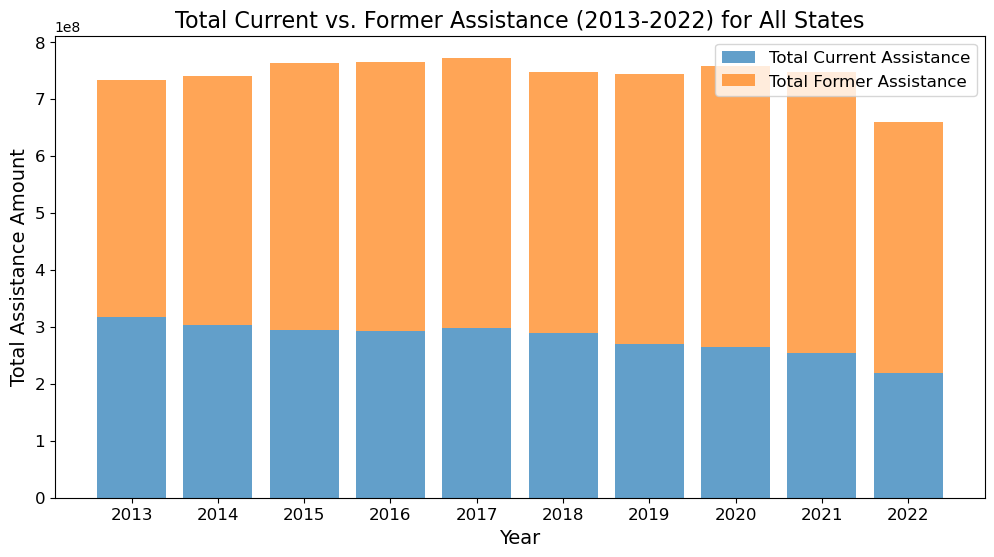

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Two DataFrames: combined_p23 for current assistance and combined_p24 for former assistance
# Extract the relevant columns (2013 to 2022)
current_years = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
former_years = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Extract assistance data for current and former
current_assistance_data = combined_p23[current_years]
former_assistance_data = combined_p24[former_years]

# Calculate the total for each year
current_total = current_assistance_data.sum().values
former_total = former_assistance_data.sum().values

# Plot the bar chart
years = list(range(2013, 2023))
plt.figure(figsize=(12, 6))
plt.bar(years, current_total, label='Total Current Assistance', alpha=0.7)
plt.bar(years, former_total, label='Total Former Assistance', alpha=0.7, bottom=current_total)

# Increase the font size for xlabel, ylabel, title, and xticks
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Assistance Amount', fontsize=14)
plt.title('Total Current vs. Former Assistance (2013-2022) for All States', fontsize=16)
plt.xticks(years, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()


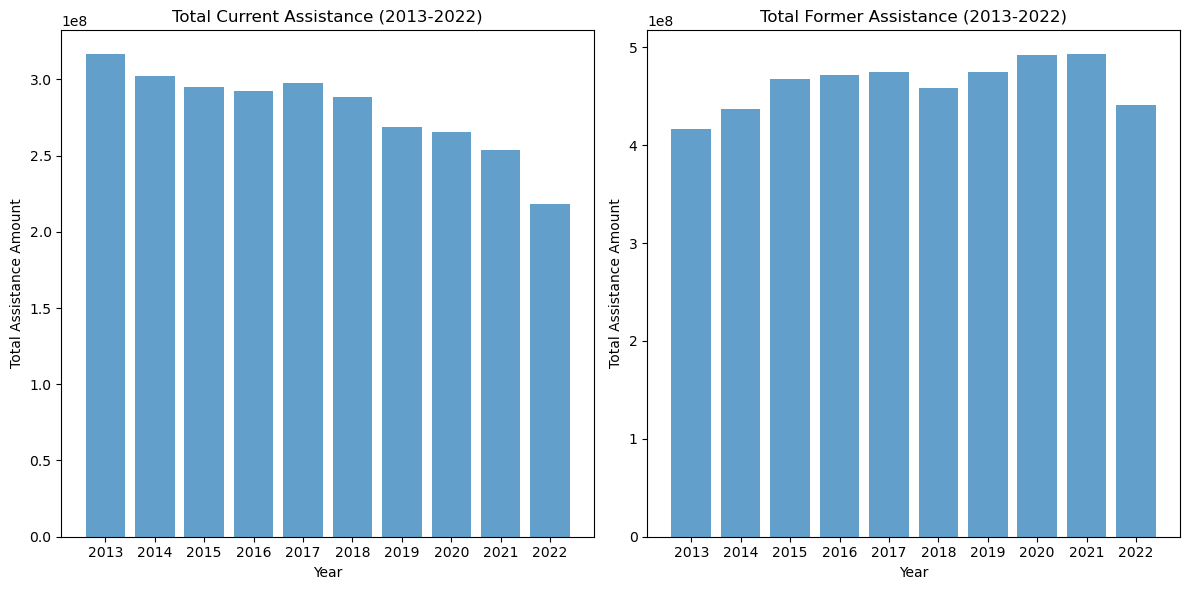

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Two DataFrames: combined_p23 for current assistance and combined_p24 for former assistance
# Extract the relevant columns (2013 to 2022)
current_years = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
former_years = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Extract assistance data for current and former
current_assistance_data = combined_p23[current_years]
former_assistance_data = combined_p24[current_years]

# Calculate the total for each year
current_total = current_assistance_data.sum().values
former_total = former_assistance_data.sum().values

# Create separate bar charts for current and former assistance
plt.figure(figsize=(12, 6))

# Bar chart for Total Current Assistance
plt.subplot(1, 2, 1)
plt.bar(years, current_total, alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Total Assistance Amount')
plt.title('Total Current Assistance (2013-2022)')
plt.xticks(years)

# Bar chart for Total Former Assistance
plt.subplot(1, 2, 2)
plt.bar(years, former_total, alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Total Assistance Amount')
plt.title('Total Former Assistance (2013-2022)')
plt.xticks(years)

plt.tight_layout()
plt.show()


## 7. By combining financial data (from a table like P-1) with statistical data (from a table like P-2), we can explore correlations between financial figures and statistical measures. For example, understanding how changes in financial allocations or collections are related to changes in case loads or assistance numbers.

In [12]:
file_path_2017 = '/Users/asmafarooq/github/Project2_Farooq_Russell_Fields/fy_2017_annual_report_data_tables.xlsx'
file_path_2022 = '/Users/asmafarooq/github/Project2_Farooq_Russell_Fields/fy_2022_preliminary_data_tables.xlsx'


p1_2017 = pd.read_excel(file_path_2017, sheet_name='1', index_col=0, header=2)
p1_2022 = pd.read_excel(file_path_2022, sheet_name='P-1', index_col=0, header=2)

p2_2017 = pd.read_excel(file_path_2017, sheet_name='2', index_col=0, header=2)
p2_2022 = pd.read_excel(file_path_2022, sheet_name='P-2', index_col=0, header=2)



# Function to clean state names in the index
def clean_state_names(df):
    df.index = df.index.astype(str).str.strip().str.upper()
    df = df[~df.index.duplicated(keep='first')]
    return df

# Clean the state names in the index of both DataFrames
p1_2017_clean = clean_state_names(p1_2017)
p1_2022_clean = clean_state_names(p1_2022)

p2_2017_clean = clean_state_names(p2_2017)
p2_2022_clean = clean_state_names(p2_2022)


# Concatenate the cleaned DataFrames
combined_p1 = pd.concat([p1_2017_clean, p1_2022_clean], axis=1)
combined_p2 = pd.concat([p2_2017_clean, p2_2022_clean], axis=1)


In [8]:
print("Length of financial_totals_p1:", len(financial_totals_p1))
print("Length of statistical_totals_p2:", len(statistical_totals_p2))
print("financial_totals_p1:", financial_totals_p1)
print("statistical_totals_p2:", statistical_totals_p2)


Length of financial_totals_p1: 5
Length of statistical_totals_p2: 5
financial_totals_p1: [28199056113, 28559134175, 28834212099, 28625294083, 28584372594]
statistical_totals_p2: [15123628.0, 14744538.0, 14522408.0, 14228533.0, 13923541.0]


In [7]:
import pandas as pd
import statsmodels.api as sm

# Values for financial_totals_p1 and statistical_totals_p2
financial_totals_p1 = [28199056113, 28559134175, 28834212099, 28625294083, 28584372594]
statistical_totals_p2 = [15123628.0, 14744538.0, 14522408.0, 14228533.0, 13923541.0]

# Create a DataFrame from the loaded data
years = list(range(2013, 2018))  # Years from 2013 to 2017 (adjust the range accordingly)
combined_data = pd.DataFrame({
    'Year': years,
    'Total Collections P-1': financial_totals_p1,
    'Total Cases P-2': statistical_totals_p2
})

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Optional: Regression analysis
# Adding a constant for the intercept
X = sm.add_constant(combined_data['Total Cases P-2'])  # Independent variable
y = combined_data['Total Collections P-1']  # Dependent variable

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                           Year  Total Collections P-1  Total Cases P-2
Year                   1.000000               0.576989        -0.997401
Total Collections P-1  0.576989               1.000000        -0.591834
Total Cases P-2       -0.997401              -0.591834         1.000000
                              OLS Regression Results                             
Dep. Variable:     Total Collections P-1   R-squared:                       0.350
Model:                               OLS   Adj. R-squared:                  0.134
Method:                    Least Squares   F-statistic:                     1.617
Date:                   Fri, 01 Dec 2023   Prob (F-statistic):              0.293
Time:                           22:12:37   Log-Likelihood:                -101.71
No. Observations:                      5   AIC:                             207.4
Df Residuals:                          3   BIC:                             206.6
Df Model:                              1                

/Users/asmafarooq/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# 8. No of cases and spend breakdown

In [5]:
file_path_2017 = '/Users/asmafarooq/github/Project2_Farooq_Russell_Fields/fy_2017_annual_report_data_tables.xlsx'
file_path_2022 = '/Users/asmafarooq/github/Project2_Farooq_Russell_Fields/fy_2022_preliminary_data_tables.xlsx'

p2_2017 = pd.read_excel(file_path_2017, sheet_name='2', index_col=0, header=2)
p2_2022 = pd.read_excel(file_path_2022, sheet_name='P-2', index_col=0, header=2)



# Function to clean state names in the index
def clean_state_names(df):
    df.index = df.index.astype(str).str.strip().str.upper()
    df = df[~df.index.duplicated(keep='first')]
    return df

# Clean the state names in the index of both DataFrames
p2_2017_clean = clean_state_names(p2_2017)
p2_2022_clean = clean_state_names(p2_2022)


# Concatenate the cleaned DataFrames

combined_p2 = pd.concat([p2_2017_clean, p2_2022_clean], axis=1)


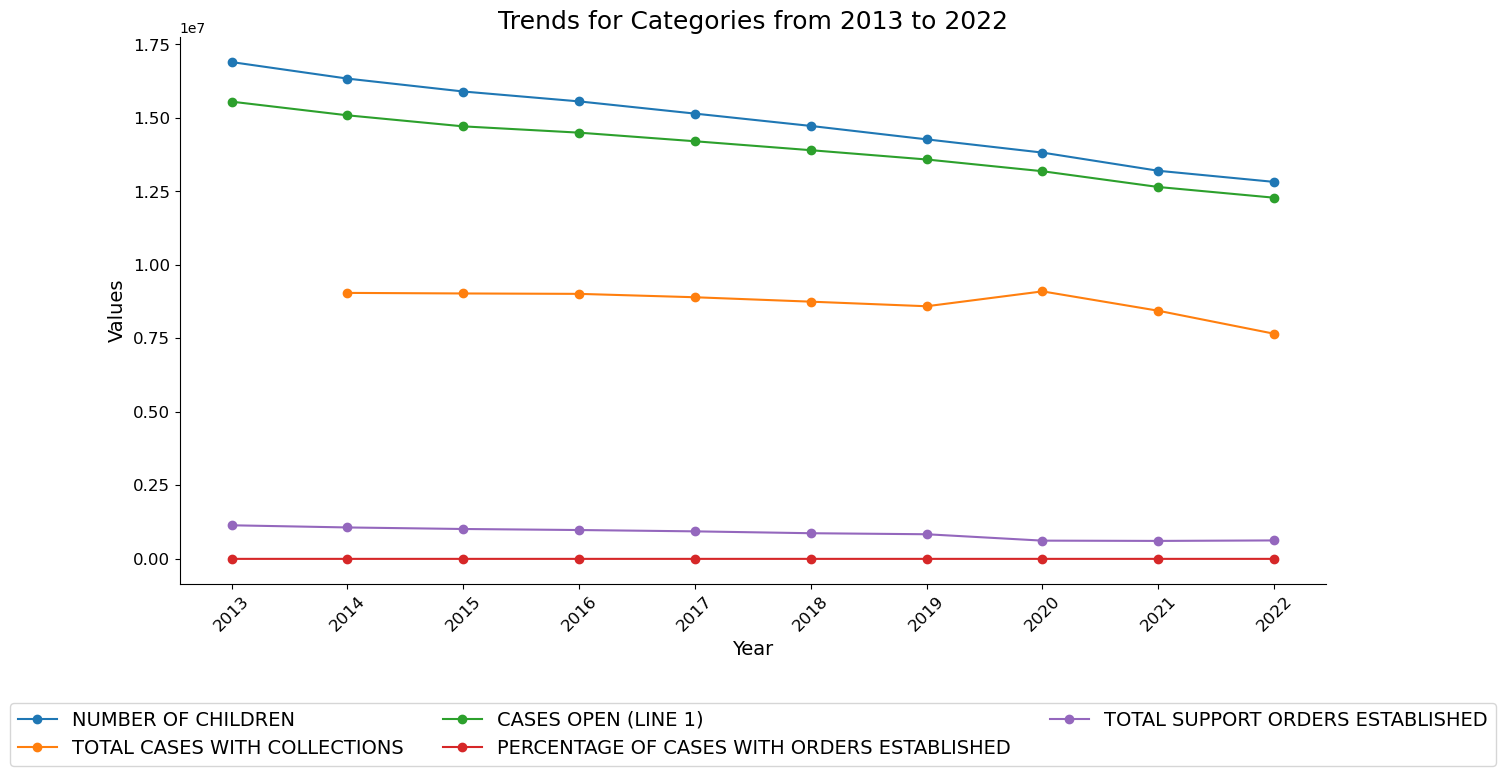

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Categories to plot
categories_to_plot = [
    'NUMBER OF CHILDREN',
    'TOTAL CASES WITH COLLECTIONS',
    'CASES OPEN (LINE 1)',
    'PERCENTAGE OF CASES WITH ORDERS ESTABLISHED',
    'TOTAL SUPPORT ORDERS ESTABLISHED'
]

# Transposing the DataFrame
combined_p2_transposed = combined_p2.T

# Convert data to numeric
for category in categories_to_plot:
    combined_p2_transposed[category] = pd.to_numeric(combined_p2_transposed[category], errors='coerce')

# Plotting
plt.figure(figsize=(15, 8))  # Adjusted figure size to accommodate external legend
for category in categories_to_plot:
    if category in combined_p2_transposed.columns:
        plt.plot(combined_p2_transposed.index, combined_p2_transposed[category], marker='o', label=category)

# Setting the font sizes for the labels, title, and ticks
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Trends for Categories from 2013 to 2022', fontsize=18)

# Moving the legend outside the graph, below the plot, and increasing the font size
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize=14)

# Setting the font size for the grid and the x-ticks
plt.grid(False)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()
